In [1]:
# Importation
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
data = pd.read_csv('data1.csv', parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
# We are just seeing the layout of the data and the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398852 entries, 0 to 398851
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    398852 non-null  datetime64[ns]
 1   county  398852 non-null  object        
 2   state   398852 non-null  object        
 3   fips    394858 non-null  float64       
 4   cases   398852 non-null  int64         
 5   deaths  398852 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.3+ MB


In [5]:
# The columns & rows of the master df
data.shape

(398852, 6)

In [6]:
# dropping cols & setting the staes as index
cols = ['fips']
data.drop(cols, axis= 1, inplace=True)
data = data.set_index('state')
data.index

Index(['Washington', 'Washington', 'Washington', 'Illinois', 'Washington',
       'California', 'Illinois', 'Washington', 'Arizona', 'California',
       ...
       'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming',
       'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming'],
      dtype='object', name='state', length=398852)

In [7]:
# resetting the index so setting the index is easier
df = data.loc[['Florida']].reset_index()
df.head()

,state,date,county,cases,deaths
0,Florida,2020-03-01,Hillsborough,1,0
1,Florida,2020-03-01,Manatee,1,0
2,Florida,2020-03-02,Hillsborough,1,0
3,Florida,2020-03-02,Manatee,1,0
4,Florida,2020-03-03,Hillsborough,2,0


In [8]:
df.shape

(9298, 5)

In [9]:
# finding unique values in the df
county = df.county.unique()

In [10]:
county.shape

(68,)

In [11]:
# setting the date column as index
df = df.set_index('date')

In [12]:
df.head()

,state,county,cases,deaths
date,,,,
2020-03-01,Florida,Hillsborough,1,0
2020-03-01,Florida,Manatee,1,0
2020-03-02,Florida,Hillsborough,1,0
2020-03-02,Florida,Manatee,1,0
2020-03-03,Florida,Hillsborough,2,0


In [13]:
df1 = df['deaths'].resample('W').mean()

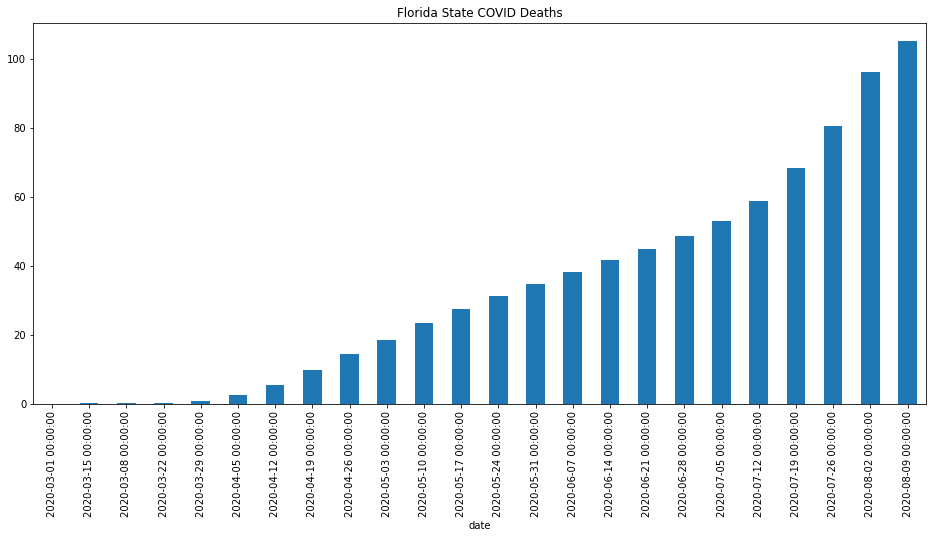

In [14]:
# Every day growth
df1.sort_values(ascending=True).plot.bar(figsize=(16,7), title='Florida State COVID Deaths')

In [15]:
df2 = pd.read_csv('flor_data_2009.csv')
df3 = pd.read_csv('flor_data_2019.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 7, saw 4
